# Bone Fracture Detection

This workbook looks at detection of bone fractures in the "human-bone-fractures-image-dataset" on Kaggle.

Here are some example images:

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\nskol\AppData\Local\Temp\ipykernel_19160\1525972818.py:12: SyntaxWarning: invalid escape sequence '\l'
  "C:\\Users\\nskol\\Downloads\\Bone Fractures Detection\\train\labels"


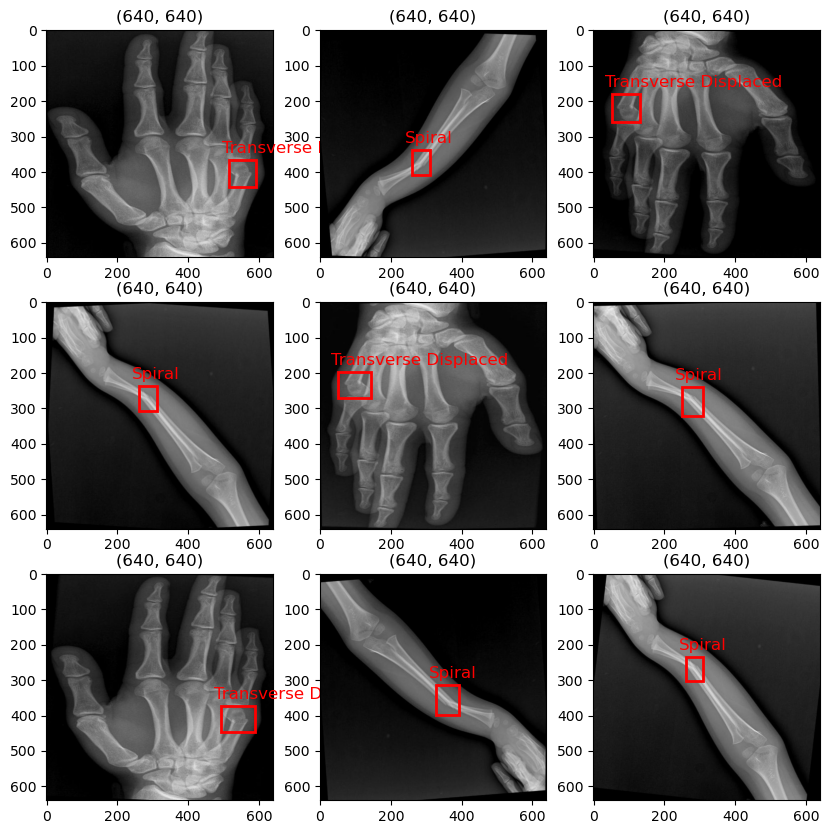

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pathlib

# Define paths to the training images and labels directories
train_images_dir = pathlib.Path(
    "C:\\Users\\nskol\\Downloads\\Bone Fractures Detection\\train\\images"
)
train_labes_dir = pathlib.Path(
    "C:\\Users\\nskol\\Downloads\\Bone Fractures Detection\\train\labels"
)

# Get a list of all .jpg image files in the training images directory
train_images = list(train_images_dir.glob("*.jpg"))

# Define the class names corresponding to the class IDs in the label files (data.yaml)
class_names = [
    'Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
    'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse'
]

# Create a 3x3 grid of subplots to display 9 images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop through the first 9 images and their corresponding axes
for i, ax in enumerate(axes.flat):
    # Open the image using PIL
    img = Image.open(train_images[i])
    
    # Display the image in the subplot
    ax.imshow(img)
    
    # Set the subplot title to the image size (width, height)
    ax.set_title(img.size)
    
    # Optional: hide axis ticks
    # ax.axis("off")

    # Construct the path to the corresponding label file
    label_path = train_labes_dir / f"{train_images[i].stem}.txt"
    
    # If the label file exists, read and parse it
    if label_path.exists():
        with open(label_path, "r") as f:
            lines = f.readlines()
        
        # Get image dimensions
        img_width, img_height = img.size
        
        # Loop through each line in the label file
        for line in lines:
            # Split the line into class ID and bounding box values
            values = line.strip().split()
            class_id = int(values[0])
            x_center, y_center, width, height = map(float, values[1:])

            # Convert normalized YOLO coordinates to pixel values
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            box_width = int(width * img_width)
            box_height = int(height * img_height)

            # Draw the bounding box on the image
            rect = patches.Rectangle(
                (x1, y1), box_width, box_height,
                linewidth=2, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)

            # Add the class name label near the bounding box
            ax.text(x1 - 20, y1 - 20, class_names[class_id], color="r", fontsize=12)



You Only Look Once (YOLO) is a real-time object detection algorithm introduced by Redmon et al. in 2016. Unlike traditional object detection methods that repurpose classifiers or localizers to perform detection in a multi-stage pipeline, YOLO reframes object detection as a single regression problem, directly predicting bounding boxes and class probabilities from full images in one evaluation.

The core idea behind YOLO is to divide the input image into an S × S grid, where each grid cell is responsible for detecting objects whose centers fall within it. For each cell, the model predicts a fixed number of bounding boxes, each with:

Coordinates (x, y, width, height) relative to the cell,
A confidence score indicating the likelihood that the box contains an object and how accurate the bounding box is,
Class probabilities for each object category.
The final detection confidence for each class is computed by multiplying the confidence score with the class probability.

Because YOLO processes the entire image in a single forward pass of a convolutional neural network (CNN), it achieves high speed and efficiency, making it particularly well-suited for real-time applications such as autonomous driving, surveillance, and robotics. Additionally, by considering global context during prediction, YOLO tends to make fewer background errors compared to region-based methods.

Over time, YOLO has evolved through multiple versions (YOLOv2, YOLOv3, YOLOv4, YOLOv5, and beyond), each improving accuracy, speed, and architectural design.

Algorithm input-output: 

- Input Image: The image is processed as a whole.

- Grid Division: The image is divided into a grid (e.g., 3×3). Each grid cell is responsible for detecting objects whose centers fall within it.

- Bounding Boxes: Each cell predicts a fixed number of bounding boxes, along with:

  - Confidence scores (how likely it is that a box contains an object),

  - Class probabilities (what kind of object it might be).
 
First, we need to install and load the YOLO library

In [5]:
#!pip install -q ultralytics

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.


# Examples

In [3]:
from ultralytics import YOLO

In [5]:
# Load a pretrained YOLOv8n model
# build a new model from YAML and transfer weights from a pretrained model (recommended for training)
#from ultralytics import YOLO
model = YOLO("yolov8n.yaml").load("yolov8n.pt") 
#print(model.model) # Prints a summary of the model architecture
for name, param in model.named_parameters():
    print(name)


Transferred 355/355 items from pretrained weights
model.model.0.conv.weight
model.model.0.bn.weight
model.model.0.bn.bias
model.model.1.conv.weight
model.model.1.bn.weight
model.model.1.bn.bias
model.model.2.cv1.conv.weight
model.model.2.cv1.bn.weight
model.model.2.cv1.bn.bias
model.model.2.cv2.conv.weight
model.model.2.cv2.bn.weight
model.model.2.cv2.bn.bias
model.model.2.m.0.cv1.conv.weight
model.model.2.m.0.cv1.bn.weight
model.model.2.m.0.cv1.bn.bias
model.model.2.m.0.cv2.conv.weight
model.model.2.m.0.cv2.bn.weight
model.model.2.m.0.cv2.bn.bias
model.model.3.conv.weight
model.model.3.bn.weight
model.model.3.bn.bias
model.model.4.cv1.conv.weight
model.model.4.cv1.bn.weight
model.model.4.cv1.bn.bias
model.model.4.cv2.conv.weight
model.model.4.cv2.bn.weight
model.model.4.cv2.bn.bias
model.model.4.m.0.cv1.conv.weight
model.model.4.m.0.cv1.bn.weight
model.model.4.m.0.cv1.bn.bias
model.model.4.m.0.cv2.conv.weight
model.model.4.m.0.cv2.bn.weight
model.model.4.m.0.cv2.bn.bias
model.model.4.

## YOLO11n Model Architecture Overview

The YOLO11n model follows a modular architecture typical of modern object detectors, structured into three main components: **Backbone**, **Neck**, and **Head**.

---

### Backbone (Layers 0–9)
The backbone is responsible for extracting hierarchical features from the input image.

| Layer | Type     | Description |
|-------|----------|-------------|
| 0–1   | `Conv`   | Initial downsampling and feature extraction. |
| 2     | `C3k2`   | Lightweight residual block with 2 convolutions. |
| 3–5   | `Conv` + `C3k2` | Further downsampling and feature enrichment. |
| 6–9   | `C3k2`, `Conv`, `SPPF` | High-level features and spatial pyramid pooling for multi-scale context. |

---

### Neck (Layers 10–22)
The neck fuses features from different scales using upsampling and concatenation to enhance spatial and semantic information.

| Layer | Type     | Description |
|-------|----------|-------------|
| 10    | `C2PSA`  | Attention-enhanced block for feature refinement. |
| 11–12 | `Upsample` + `Concat` | Merge high-level and mid-level features. |
| 13    | `C3k2`   | Feature fusion. |
| 14–15 | `Upsample` + `Concat` | Merge with low-level features. |
| 16    | `C3k2`   | Final fusion block. |
| 17–22 | `Conv`, `Concat`, `C3k2` | Downsample and merge again for multi-scale detection. |

---

### Head (Layer 23)
The head performs final object detection by predicting bounding boxes, objectness scores, and class probabilities.

| Layer | Type     | Description |
|-------|----------|-------------|
| 23    | `Detect` | Outputs predictions at 3 scales: `[64, 128, 256]` channels. |

---



# Train the model

In [7]:
# We are going to freeze the first 10 layers of the YOLO model as we 
# 1) want to speed up training, 
# 2) have a small dataset and want to avoid overfitting
# 3) want to retain low-level features from the pretrained model.
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")


#model.add_callback("on_train_start", freeze_layer)

# Train the model
data_yaml="C:\\Users\\nskol\\Downloads\\Bone Fractures Detection\\data.yaml"

# #train_results = model.train(data=data_yaml, epochs=40, imgsz=640)
# train_results = model.train(
#     data=data_yaml,
#     device="cpu",    # be explicit
#     epochs=12,       # small dataset -> don't go crazy
#                      # smaller images = big speedup
#     batch=4,         # keep memory low, CPU-friendly
#     workers=0,       # 0 or 1 is often best on Windows
#     cache=True,      # keep images in RAM (dataset is small)
#     freeze=10,       # freeze early backbone layers, less compute
#     patience=3,      # stop early if val metric doesn't improve
#     verbose=False,   # less logging overhead
# )
# Train the model using YOLOv8
train_results = model.train(
    data=data_yaml,
    device="cpu",    # use CPU; change to 0 for GPU
    epochs=80,       # more epochs for better convergence
    batch=4,         # small batch size for CPU
    workers=0,       # CPU dataloader workers
    cache=True,      # cache images in RAM        
    verbose=False,   # less logging
)


New https://pypi.org/project/ultralytics/8.3.237 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.235  Python-3.12.7 torch-2.9.1+cpu CPU (12th Gen Intel Core i7-12700H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\nskol\Downloads\Bone Fractures Detection\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=tra

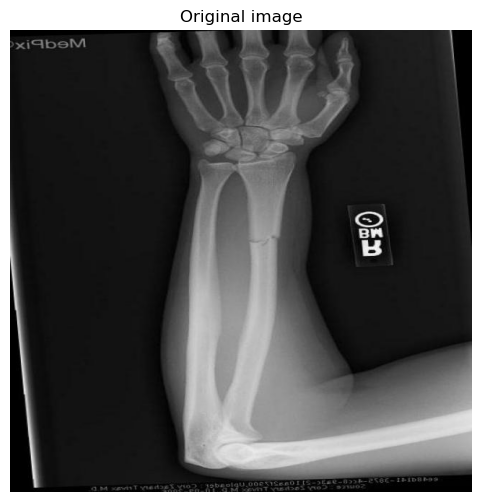


image 1/1 C:\Users\nskol\Downloads\Bone Fractures Detection\test\images\121_jpg.rf.4d5e78cd52763455e55b0f0d84b111c2.jpg: 640x640 1 Transverse Displaced, 123.4ms
Speed: 4.1ms preprocess, 123.4ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
# Perform object detection on a random image from the test set
import pathlib, random
from PIL import Image
import matplotlib.pyplot as plt

test_images_path = pathlib.Path("C:/Users/nskol/Downloads/Bone Fractures Detection/test/images")
image_paths = list(test_images_path.glob("*.jpg"))
random_image = random.choice(image_paths)

# Display the original image
img = Image.open(random_image)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Original image")
plt.show()

# Perform detection with YOLOv8
results = model(random_image)

# Display detection results
results[0].show()


# Calculate the metrics

In [11]:
# Evaluate the trained YOLOv8 model on the validation and test sets
metrics_val = model.val(data=data_yaml, split="val")   # evaluate on validation split
metrics_test = model.val(data=data_yaml, split="test")  # evaluate on test split


Ultralytics 8.3.235  Python-3.12.7 torch-2.9.1+cpu CPU (12th Gen Intel Core i7-12700H)
val: Fast image access  (ping: 0.30.2 ms, read: 1.70.5 MB/s, size: 25.0 KB)
val: Scanning C:\Users\nskol\Downloads\Bone Fractures Detection\valid\labels.cache... 128 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 126.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.9s/it 15.1s2.0s
                   all        128        157      0.899      0.829      0.906      0.509
            Comminuted         15         15          1      0.743      0.813      0.487
            Greenstick         10         10      0.988        0.5      0.591      0.265
               Healthy          7          7      0.888          1      0.995       0.79
                Linear          1          1      0.859          1      0.995      0.398
     Oblique Displaced         30         30          1       0.84       0.98      0.451
       

In [13]:
P    = metrics_test.box.mp       # mean precision
R    = metrics_test.box.mr       # mean recall
mAP50   = metrics_test.box.map50     # mAP@0.5
mAP5095 = metrics_test.box.map       # mAP@0.5:0.95

F1 = 2 * P * R / (P + R)

print(f"Precision: {P:.4f}")
print(f"Recall:    {R:.4f}")
print(f"F1 score:  {F1:.4f}")
print(f"mAP@0.5:   {mAP50:.4f}")
print(f"mAP@0.5:0.95: {mAP5095:.4f}")


Precision: 0.9266
Recall:    0.8921
F1 score:  0.9090
mAP@0.5:   0.9197
mAP@0.5:0.95: 0.5073


In [15]:
# The best model weights are loaded via the YOLOv8 scripts; nothing to do here.
# Load the best model from training
best_model = YOLO("runs/detect/train/weights/best.pt")

## Predict test dataset

In [42]:
# YOLOv8 evaluation is performed above; no additional evaluation needed.
pass


Ultralytics 8.3.235  Python-3.12.7 torch-2.9.1+cpu CPU (12th Gen Intel Core i7-12700H)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 127.224.6 MB/s, size: 28.7 KB)
val: Scanning C:\Users\nskol\Downloads\Bone Fractures Detection\test\labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 64/64 58.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.9s/it 7.4s2.8ss
                   all         64         66      0.736     0.0952      0.133     0.0395
            Comminuted          9          9      0.452      0.222      0.192     0.0536
            Greenstick          1          1          1          0     0.0142    0.00284
               Healthy          3          3          1          0      0.457      0.148
     Oblique Displaced         16         17      0.302      0.235      0.107     0.0329
               

### Output Description

| **Column**     | **Description**                                                                 |
|----------------|----------------------------------------------------------------------------------|
| **Class**      | The name of the object class (e.g., *Comminuted*, *Greenstick*, etc.)           |
| **Images**     | Number of test images containing at least one instance of this class            |
| **Instances**  | Total number of ground truth objects of this class in the test set              |
| **Box(P)**     | **Precision**: Proportion of predicted boxes that are correct                   |
| **R**          | **Recall**: Proportion of actual objects that were correctly detected           |
| **mAP50**      | Mean Average Precision at IoU threshold 0.5 — standard detection metric         |
| **mAP50-95**   | Mean Average Precision averaged over IoU thresholds from 0.5 to 0.95 — stricter |


The code below shows some more examples from our predictions:


image 1/1 C:\Users\nskol\Downloads\Bone Fractures Detection\test\images\101_jpg.rf.92e32f9dfb9b34f9a123b16629cc368d.jpg: 640x640 (no detections), 135.5ms
Speed: 6.9ms preprocess, 135.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\nskol\Downloads\Bone Fractures Detection\test\images\105_jpg.rf.94d0238829c3a96406a17438712f5840.jpg: 640x640 1 Transverse Displaced, 82.6ms
Speed: 4.0ms preprocess, 82.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\nskol\Downloads\Bone Fractures Detection\test\images\108_jpg.rf.596cf88834b2ae2a65d1af826e75dff1.jpg: 640x640 1 Oblique Displaced, 2 Transverse Displaceds, 81.6ms
Speed: 4.1ms preprocess, 81.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\nskol\Downloads\Bone Fractures Detection\test\images\110_jpg.rf.c046632c264a3643d2d65546a75fcece.jpg: 640x640 (no detections), 110.1ms
Speed: 4.5ms preprocess, 110.1ms inference, 0.9ms post

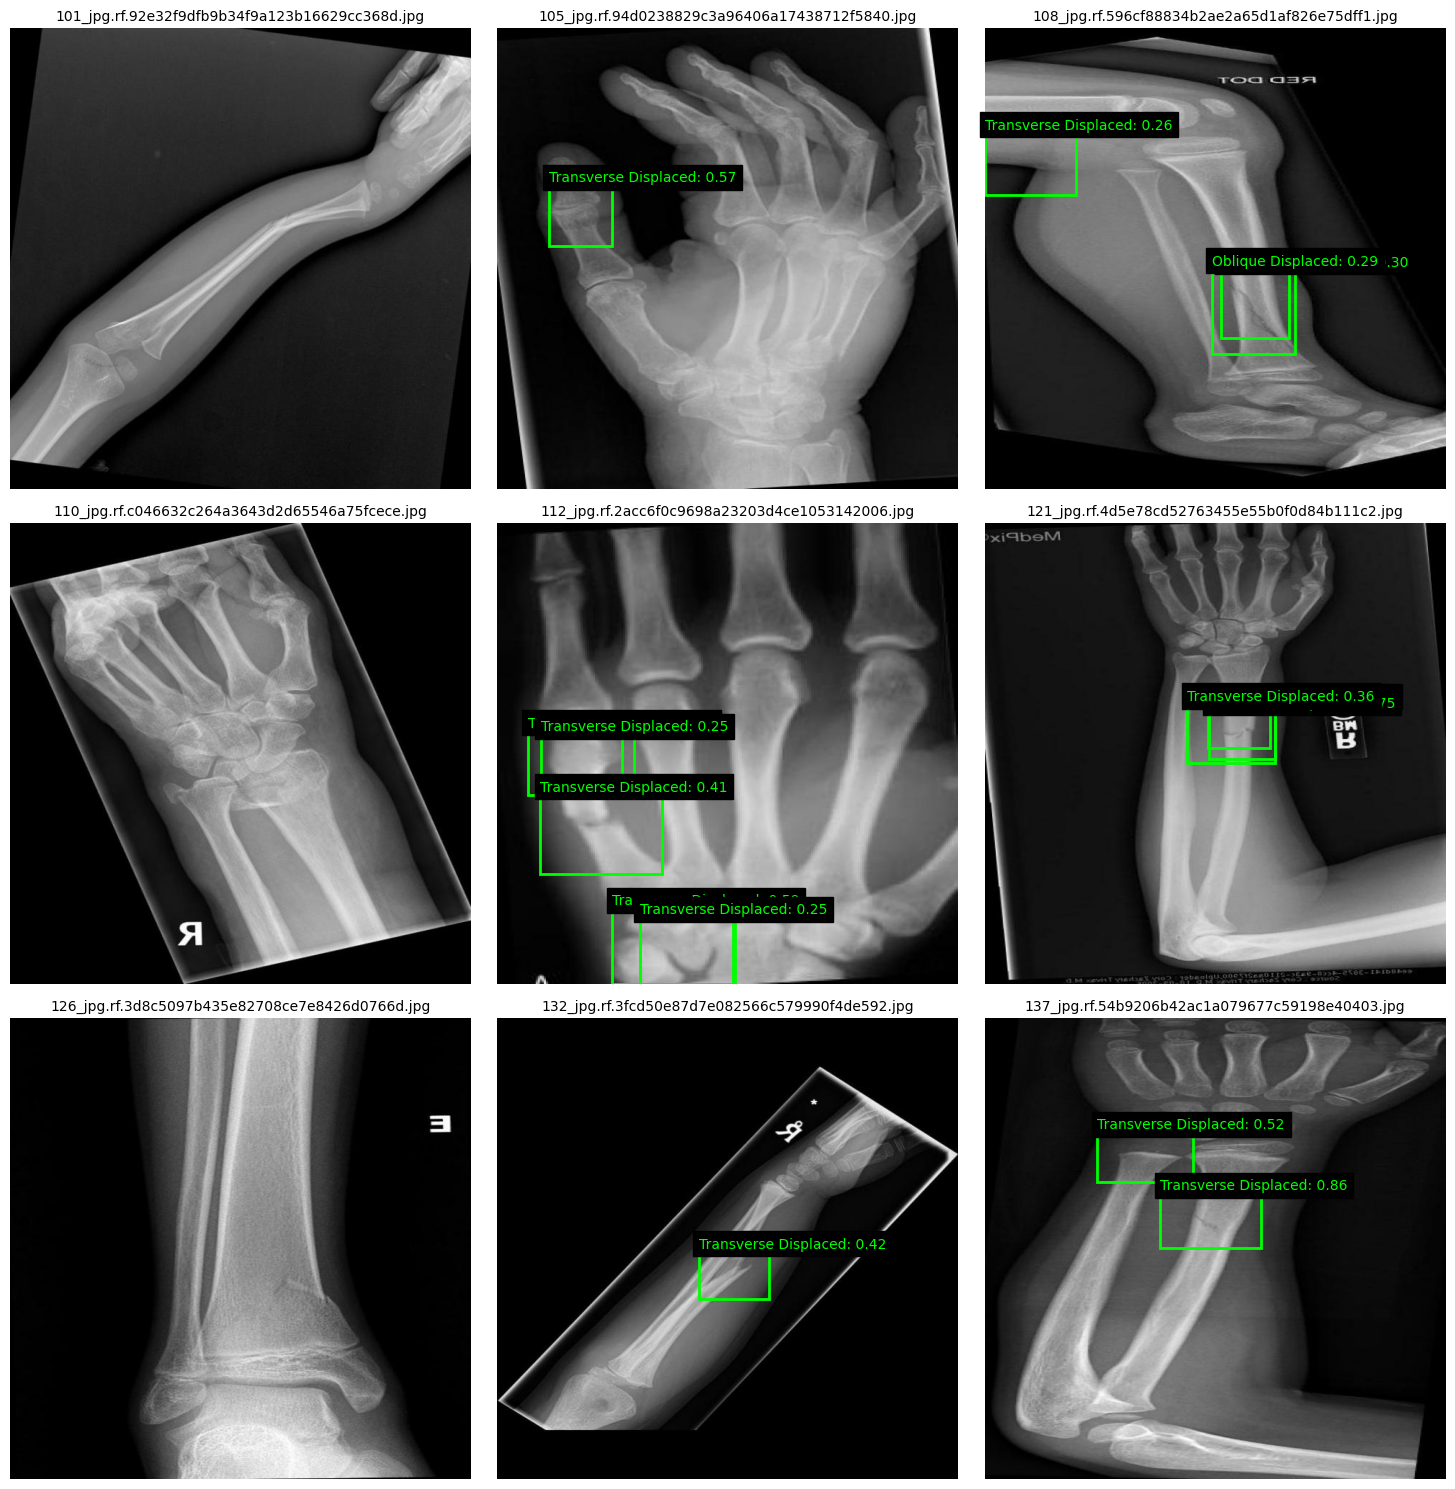

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import pathlib

# List of 9 test images (update this with your actual test image paths)
test_images = list(pathlib.Path("C:\\Users\\nskol\\Downloads\\Bone Fractures Detection\\test\\images").glob("*.jpg"))[:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop through the first 9 images and their corresponding axes
for i, ax in enumerate(axes.flat):
    img_path = test_images[i]
    
    # Perform prediction
    results = best_model(img_path)
    result = results[0]

    # Load image
    img = Image.open(img_path)
    ax.imshow(img)
    
    # Set title to image name or size
    ax.set_title(img_path.name, fontsize=10)
    ax.axis("off")

    # Draw predicted bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        conf = float(box.conf[0])

        # Draw rectangle
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

        # Add class label and confidence
        label = f"{class_names[class_id]}: {conf:.2f}"
        ax.text(x1, y1 - 10, label, color='lime', fontsize=10, backgroundcolor='black')

plt.tight_layout()
plt.show()
